In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define signal parameters
fs = 1000 # Sample rate (Hz)
duration = 5 # Signal duration (s)
f_signal = 10 # Signal frequency (Hz)
amplitude = 1 # Signal amplitude

# Generate time vector
t = np.arange(0, duration, 1/fs)

# Generate signal
signal = amplitude * np.sin(2*np.pi*f_signal*t)


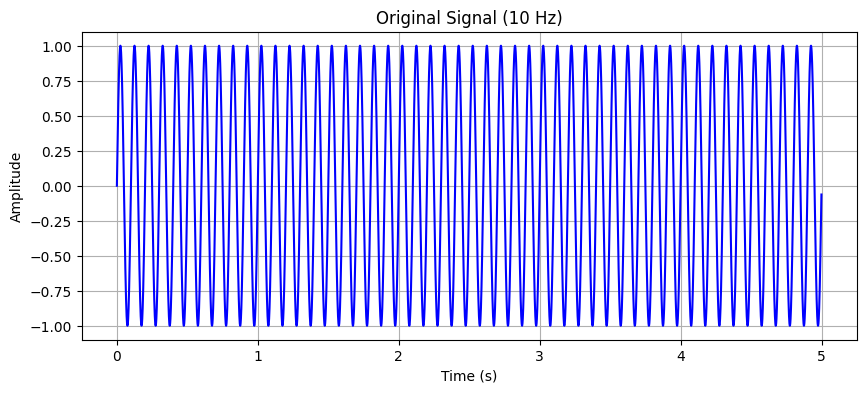

In [11]:
# Plot the signal
plt.figure(figsize=(10,4))
plt.plot(t, signal, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal ({} Hz)'.format(f_signal))
plt.grid(True)
plt.savefig("plots/Orignal_Signal.png")
plt.show()

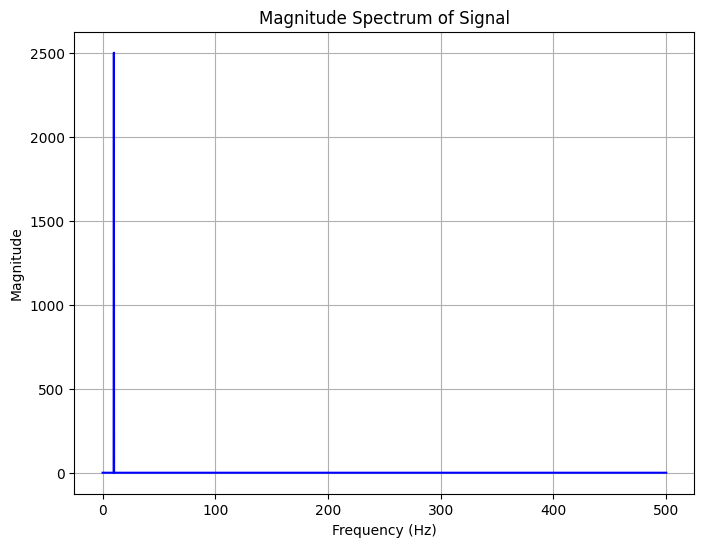

In [12]:
# Calculate FFT of the signal
n = len(signal)
freq = np.fft.rfftfreq(n, d=1/fs)
mag = np.abs(np.fft.rfft(signal))

# Plot the magnitude spectrum
plt.figure(figsize=(8,6))
plt.plot(freq, mag, 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Signal')
plt.grid(True)
plt.savefig("plots/Orignal_Signal_FFT.png")
plt.show()